**If you lost points on the last checkpoint you can get them back by responding to TA/IA feedback**  

Update/change the relevant sections where you lost those points, make sure you respond on GitHub Issues to your TA/IA to call their attention to the changes you made here.

Please update your Timeline... no battle plan survives contact with the enemy, so make sure we understand how your plans have changed.

# COGS 108 - EDA Checkpoint

# Names

- Finnegan Sullivan A17672893
- Nabila Afifah Qotrunnada A18500553
- Kalkidan Berhe Gebrekirstos A18484099
- Chi-en Kao A18064210
- Aziza Hussein A16954820

# Research Question

-  Can a Quarterback's college statistics and NFL combine metrics be used to accurately predict whether they will be drafted into the NFL?

- This project aims to answer: To what extent can a quarterback’s college performance metrics and NFL Combine results predict their likelihood of being drafted into the NFL, and which specific features (e.g., college QBR, rushing statistics, 40-yard dash time) are most strongly associated with this outcome?


## Background and Prior Work

NFL teams rely heavily on college statistics and NFL Combine performance when evaluating quarterback talent. However, it’s unclear which specific metrics actually influence draft outcomes. Several prior studies provide insight into this complex decision-making process.

Craig & Winchester (2021) found that college passing metrics are the strongest indicators of a quarterback being drafted, while rushing performance better predicts future NFL success. They argue that mobility and rushing ability are undervalued by scouts.<a name="#1"> </a><sup>1</sup>

Wolfson et al. (2011) explored the “Quarterback Prediction Problem” and concluded that many draft outcomes do not align with actual NFL performance. They attribute this to a mix of random variation and overemphasis on traits like height and arm strength that may not correlate with success.<a name="#2"> </a><sup>2</sup>

More recent studies like those from Sports Info Solutions (2025) show a substantial drop in on-target passing percentages from college to the NFL, suggesting that translating college success to professional performance is not straightforward.<a name="#3"> </a><sup>3</sup>

Together, these studies point out the need for a more data-driven approach to draft forecasting. Our project builds on this work by using modern datasets and tools to identify which pre-draft traits are most predictive of quarterback draft status.


<a name="ref1">1.</a> Craig, J. D., & Winchester, N. (2021). Predicting the national football league potential of college quarterbacks. European Journal of Operational Research. https://doi.org/10.1016/j.ejor.2021.03.013 ↩
<a name="ref2">2.</a> Wolfson, J., Addona, V., & Schmicker, R. (2011). The Quarterback Prediction Problem. Journal of Quantitative Analysis in Sports. https://doi.org/10.2202/1559-0410.1302 ↩
<a name="ref3">3.</a> Study Comparing College and NFL On-Target Percentage. Sports Info Solutions (2025). https://www.sportsinfosolutions.com/2025/04/08/study-comparing-college-and-nfl-on-target-percentage/ ↩


# Hypothesis


Null Hypothesis (H₀): A quarterback’s college statistics and NFL Combine metrics (such as QBR, rushing yards, and 40-yard dash time) have no association with whether they are drafted into the NFL.

Alternative Hypothesis (H₁): At least one of these features is significantly associated with a quarterback’s likelihood of being drafted.

We predict that quarterbacks with higher college QRBs and faster 40 yard dash times are more likely to be drafted, considering the current game plans needing dual threat quarterbacks, which increases their value. We are supporting this hypothesis by Craig & Winchester, Predicting the national football league potential of college quarterbacks (2021), who found that passing performance is a strong indicator of draft selection, while rushing traits are often undervalued.1

1. Craig, J. D., & Winchester, N. (2021). Predicting the national football league potential of college quarterbacks. European Journal of Operational Research. https://doi.org/10.1016/j.ejor.2021.03.013


# Data

## Data overview

- Dataset #1
  - Dataset Name: NFL Combine Results Dataset 2000–2022
  - Link to the dataset:https://www.kaggle.com/datasets/mitchellweg1/nfl-combine-results-dataset-2000-2022
  - Number of observations:6,128 players
  - Number of variables: 7
  - Description: This dataset includes NFL Scouting Combine performance metrics from 2000 to 2022, including player positions and schools. It also features attributes such as 40-yard dash time, bench press reps, vertical jump, broad jump, 3-cone drill, shuttle run, height, and weight. This dataset serves as a comprehensive resource that evaluates physical and athletic capabilities of NFL prospects. These performance variables will be used to explore their predictive relationship with draft outcomes and long-term success in the NFL. 
- Dataset #2 
  - Dataset Name: NFL Draft Dataset 2000–2022
  - Link to the dataset:https://www.kaggle.com/datasets/mitchellweg1/nfl-draft-dataset-2000-2022
  - Number of observations: 2,000 players
  - Number of variables: 10
  - Description: This dataset records players drafted between 2000 and 2022, with fields for draft year, round, overall pick number, team, player name, and position. When merged with the Combine dataset, it enables us to analyze how pre-draft athletic metrics influence draft slot and long-term NFL career outcomes.
- Dataset #3
  - Dataset Name: NCAA College Quarterback Data
  - Link to the dataset: https://www.kaggle.com/datasets/av8ramit/ncaa-college-quarterback-data
  - Number of observations: ~2,500 quarterbacks (across multiple seasons)
  - Number of variables: season-by-season passing (yardage, TDs, INTs), rushing stats, completion %, plus an indicator for “drafted vs. not drafted.”
  - Description: directly ties college performance to eventual draft status, letting you validate your Combat-108 model on a broader college-only cohort

In [24]:
!pip install -q kagglehub
!pip install seaborn
!pip install missingno


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [25]:
import kagglehub 
from kagglehub import KaggleDatasetAdapter
import pandas as pd
import os
import glob


## Dataset: NFL Combine Results Dataset 2000–2022

In [26]:
## YOUR CODE TO LOAD/CLEAN/TIDY/WRANGLE THE DATA GOES HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION 
dataset = "mitchellweg1/nfl-combine-results-dataset-2000-2022"
years = range(2000, 2023)  # Covers 2000 through 2022
file_paths = [f"{year}_combine.csv" for year in years]  # Constructs filenames

# Load all files into a single dataframe
dfs = []
for file_path in file_paths:
    df = kagglehub.load_dataset(KaggleDatasetAdapter.PANDAS, dataset, file_path)
    df["Year"] = file_path[:4]  # Add the year as a column
    dfs.append(df)

# Merge all individual dataframes into one
combine_df = pd.concat(dfs, ignore_index=True)

/var/folders/sc/j3bpjj057715tv_rwk_457_40000gn/T/ipykernel_96777/3083271664.py:10: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(KaggleDatasetAdapter.PANDAS, dataset, file_path)
/var/folders/sc/j3bpjj057715tv_rwk_457_40000gn/T/ipykernel_96777/3083271664.py:10: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(KaggleDatasetAdapter.PANDAS, dataset, file_path)
/var/folders/sc/j3bpjj057715tv_rwk_457_40000gn/T/ipykernel_96777/3083271664.py:10: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(KaggleDatasetAdapter.PANDAS, dataset, file_path)
/var/folders/sc/j3bpjj057715tv_rwk_457_40000gn/T/ipykernel_96777/3083271664.py:10: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(KaggleDatasetAdapter.PANDAS, dataset, file_path)


In [27]:
combine_df

,Player,Pos,School,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,Year
0,John Abraham,OLB,South Carolina,6-4,252.0,4.55,NaN,NaN,NaN,NaN,NaN,2000
1,Shaun Alexander,RB,Alabama,6-0,218.0,4.58,NaN,NaN,NaN,NaN,NaN,2000
2,Darnell Alford,OT,Boston Col.,6-4,334.0,5.56,25.0,23.0,94.0,8.48,4.98,2000
3,Kyle Allamon,TE,Texas Tech,6-2,253.0,4.97,29.0,NaN,104.0,7.29,4.49,2000
4,Rashard Anderson,CB,Jackson State,6-2,206.0,4.55,34.0,NaN,123.0,7.18,4.15,2000
...,...,...,...,...,...,...,...,...,...,...,...,...
7675,Devonte Wyatt,DT,Georgia,6-3,304.0,4.77,29.0,NaN,111.0,NaN,NaN,2022
7676,Jalen Wydermyer,TE,Texas A&M,6-4,255.0,NaN,NaN,NaN,NaN,NaN,NaN,2022
7677,Cade York,K,LSU,6-1,206.0,NaN,NaN,12.0,NaN,NaN,NaN,2022
7678,Nick Zakelj,OT,Fordham,6-6,316.0,5.13,28.5,27.0,110.0,7.75,4.71,2022


In [28]:
print('Columns: ', combine_df.columns)
print('Shape: ', combine_df.shape)
print('Data types: ', combine_df.dtypes)
print('Missing values: ', combine_df.isnull().sum())

Columns:  Index(['Player', 'Pos', 'School', 'Ht', 'Wt', '40yd', 'Vertical', 'Bench',
       'Broad Jump', '3Cone', 'Shuttle', 'Year'],
      dtype='object')
Shape:  (7680, 12)
Data types:  Player         object
Pos            object
School         object
Ht             object
Wt            float64
40yd          float64
Vertical      float64
Bench         float64
Broad Jump    float64
3Cone         float64
Shuttle       float64
Year           object
dtype: object
Missing values:  Player           0
Pos              0
School           0
Ht              29
Wt              24
40yd           474
Vertical      1748
Bench         2584
Broad Jump    1821
3Cone         2888
Shuttle       2785
Year             0
dtype: int64


## Dataset: NFL Draft Dataset 2000–2022

In [29]:
## YOUR CODE TO LOAD/CLEAN/TIDY/WRANGLE THE DATA GOES HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION 
dataset = "mitchellweg1/nfl-draft-dataset-2000-2022"

# Download the entire dataset
download_path = kagglehub.dataset_download(dataset)
    
    # Find all CSV files in the downloaded directory
csv_files = glob.glob(os.path.join(download_path, "*.csv"))
    
draft_df = pd.concat([pd.read_csv(file) for file in csv_files], ignore_index=True)

In [30]:
draft_df

,Rnd,Pick,Tm,Player,Pos,Age
0,1,1,ARI,Kyler Murray,QB,22.0
1,1,2,SFO,Nick Bosa,DE,21.0
2,1,3,NYJ,Quinnen Williams,DT,21.0
3,1,4,OAK,Clelin Ferrell,DE,22.0
4,1,5,TAM,Devin White,LB,21.0
...,...,...,...,...,...,...
5866,7,251,STL,Madison Hedgecock,FB,24.0
5867,7,252,PHI,David Bergeron,LB,NaN
5868,7,253,TAM,J.R. Russell,WR,NaN
5869,7,254,SEA,Doug Nienhuis,T,23.0


In [31]:
draft_df.shape

(5871, 6)

## Dataset: NCAA College Quarterback Data

In [32]:
dataset = "av8ramit/ncaa-college-quarterback-data"

# Download the entire dataset
download_path = kagglehub.dataset_download(dataset)

# Find all CSV files in the downloaded directory
csv_files = glob.glob(os.path.join(download_path, "*.csv"))
qb_df = pd.concat([pd.read_csv(file) for file in csv_files], ignore_index=True)
qb_df

,DraftYear,Round,Pick,Age,GamesPlayed,Completions,Attempts,Yards,Touchdowns,Interceptions,RushAttempts,RushYards,RushTouchdowns,Player,College,Conference,Team,Heisman,Verdict
0,2013,1,16,23,43,600,897,7741,47,28,298,827,11,EJ Manuel,Florida St.,Atlantic Coast,BUF,0,0
1,2013,2,39,22,44,988,1465,11662,98,21,245,342,4,Geno Smith,West Virginia,Big 12,NYJ,0,0
2,2013,3,73,23,36,646,1069,7411,63,31,111,-281,3,Mike Glennon,North Carolina St.,Atlantic Coast,TAM,0,0
3,2013,4,98,23,47,1001,1562,12327,116,48,132,-113,6,Matt Barkley,USC,Pac-12,PHI,0,0
4,2013,4,110,23,47,791,1312,9190,70,28,242,168,5,Ryan Nassib,Syracuse,Atlantic Coast,NYG,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,1999,1,2,22,45,548,938,8389,77,26,465,1561,19,Donovan McNabb,Syracuse,Atlantic Coast,PHI,0,1
153,1999,1,3,24,23,323,571,5148,45,15,171,367,6,Akili Smith,Oregon,Pac-12,CIN,0,0
154,2009,6,174,24,45,584,989,6857,47,32,132,152,8,Tom Brandstater,Fresno St.,Mountain West,DEN,0,0
155,2009,6,201,24,46,987,1648,11163,67,46,225,348,13,Curtis Painter,Purdue,Big Ten,IND,0,0


In [33]:
merged_df = pd.merge(
    draft_df,
    combine_df,
    on=['Player', 'Pos'],
    how='right'
)
# Filter for Quarterbacks (QB) and merge with the QB data
qb_only_df = merged_df.query('Pos == "QB"')
qb_only_df = qb_only_df.reset_index(drop=True)
qb_only_df

,Rnd,Pick,Tm,Player,Pos,Age,School,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,Year
0,6.0,199.0,NWE,Tom Brady,QB,23.0,Michigan,6-4,211.0,5.28,24.5,NaN,99.0,7.20,4.38,2000
1,NaN,NaN,NaN,Travis Brown,QB,NaN,Northern Arizona,6-3,218.0,5.01,29.0,NaN,101.0,7.54,4.87,2000
2,6.0,168.0,NOR,Marc Bulger,QB,23.0,West Virginia,6-2,208.0,4.97,NaN,NaN,100.0,7.46,4.34,2000
3,NaN,NaN,NaN,Bill Burke,QB,NaN,Michigan State,6-4,206.0,5.03,28.5,NaN,107.0,7.46,4.42,2000
4,3.0,65.0,SFO,Giovanni Carmazzi,QB,NaN,Hofstra,6-3,224.0,4.74,36.5,NaN,119.0,6.94,4.23,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,3.0,74.0,ATL,Desmond Ridder,QB,23.0,Cincinnati,6-3,211.0,4.52,36.0,NaN,127.0,7.15,4.29,2022
413,NaN,NaN,NaN,Carson Strong,QB,NaN,Nevada,6-3,226.0,NaN,NaN,NaN,NaN,NaN,NaN,2022
414,7.0,247.0,MIA,Skylar Thompson,QB,25.0,Kansas St.,6-2,217.0,4.91,31.0,NaN,112.0,7.00,4.28,2022
415,3.0,86.0,TEN,Malik Willis,QB,23.0,Liberty,6-1,219.0,NaN,NaN,NaN,NaN,NaN,NaN,2022


In [34]:
qb_data = pd.merge(
    qb_only_df,
    qb_df,
    on=['Player','Pick','Age'],
    how='left'
)
qb_data

,Rnd,Pick,Tm,Player,Pos,Age,School,Ht,Wt,40yd,...,Touchdowns,Interceptions,RushAttempts,RushYards,RushTouchdowns,College,Conference,Team,Heisman,Verdict
0,6.0,199.0,NWE,Tom Brady,QB,23.0,Michigan,6-4,211.0,5.28,...,30.0,17.0,90.0,-150.0,3.0,Michigan,Big Ten,NWE,0.0,1.0
1,NaN,NaN,NaN,Travis Brown,QB,NaN,Northern Arizona,6-3,218.0,5.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6.0,168.0,NOR,Marc Bulger,QB,23.0,West Virginia,6-2,208.0,4.97,...,59.0,34.0,107.0,-326.0,2.0,West Virginia,Big 12,NOR,0.0,1.0
3,NaN,NaN,NaN,Bill Burke,QB,NaN,Michigan State,6-4,206.0,5.03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,65.0,SFO,Giovanni Carmazzi,QB,NaN,Hofstra,6-3,224.0,4.74,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,3.0,74.0,ATL,Desmond Ridder,QB,23.0,Cincinnati,6-3,211.0,4.52,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
413,NaN,NaN,NaN,Carson Strong,QB,NaN,Nevada,6-3,226.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
414,7.0,247.0,MIA,Skylar Thompson,QB,25.0,Kansas St.,6-2,217.0,4.91,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
415,3.0,86.0,TEN,Malik Willis,QB,23.0,Liberty,6-1,219.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Missing Value Treatment

We visualized missing data across all features using a heatmap. Yellow areas in the heatmap represent missing values. Several key observations emerged:

- **Combine metrics** such as `40yd`, `Vertical`, `Bench`, `Broad Jump`, `3Cone`, and `Shuttle` had substantial missing values across many rows.
- **Draft information** like `Rnd` and `Pick` was missing for a large subset of players — this is expected and corresponds to undrafted quarterbacks.
- **College performance statistics** (`Yards`, `Touchdowns`, `RushYards`, etc.) were missing for players not matched to the NCAA dataset.

To address these issues:
- We applied **median imputation** to the Combine-related columns, replacing missing values with the median for each feature. This allowed us to retain rows where only some Combine values were missing, preventing unnecessary loss of data.
- We intentionally **preserved undrafted players** (rows with missing `Rnd`/`Pick`) since they are essential for answering our classification research question (i.e., what differentiates drafted from undrafted QBs).
- No rows were dropped, ensuring that we keep a representative population for our analysis.

This data cleaning step ensures the dataset is usable for downstream analysis while respecting the integrity of the draft status variable.

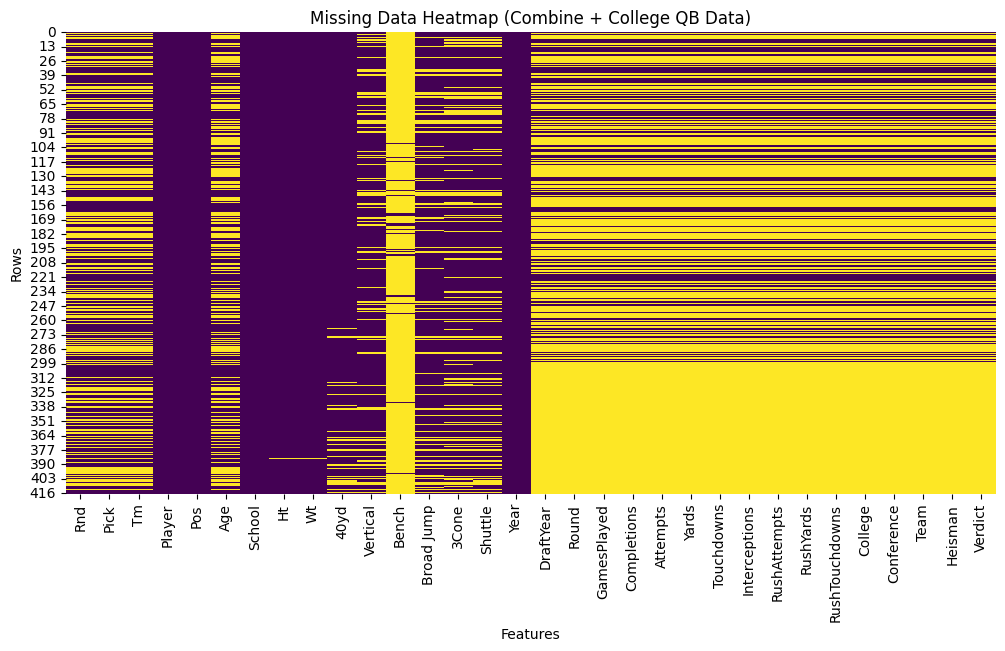

Missing values per column:
 Rnd               174
Pick              174
Tm                174
Player              0
Pos                 0
Age               186
School              0
Ht                  1
Wt                  1
40yd               24
Vertical           78
Bench             397
Broad Jump         77
3Cone              99
Shuttle            94
Year                0
DraftYear         295
Round             295
GamesPlayed       295
Completions       295
Attempts          295
Yards             295
Touchdowns        295
Interceptions     295
RushAttempts      295
RushYards         295
RushTouchdowns    295
College           295
Conference        295
Team              295
Heisman           295
Verdict           295
dtype: int64

Missing BEFORE fill:
 40yd           24
Vertical       78
Bench         397
Broad Jump     77
3Cone          99
Shuttle        94
dtype: int64

Missing AFTER fill:
 40yd          0
Vertical      0
Bench         0
Broad Jump    0
3Cone         0
Shuttle  

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize missing values using a seaborn heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(qb_data.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Data Heatmap (Combine + College QB Data)")
plt.xlabel("Features")
plt.ylabel("Rows")
plt.show()

# Show missing value counts
missing_counts = qb_data.isnull().sum()
print("Missing values per column:\n", missing_counts)

# Combine metrics we'll clean
combine_metrics = ['40yd', 'Vertical', 'Bench', 'Broad Jump', '3Cone', 'Shuttle']

# Show missing values BEFORE filling
print("\nMissing BEFORE fill:\n", qb_data[combine_metrics].isnull().sum())

# Fill missing Combine values using median
for col in combine_metrics:
    qb_data[col] = qb_data[col].fillna(qb_data[col].median())

#missing values AFTER filling
print("\nMissing AFTER fill:\n", qb_data[combine_metrics].isnull().sum())


# Results

## Exploratory Data Analysis

Below we present two EDA investigations examining quarterback draft outcomes. Each section addresses a specific research question using the available data from our merged dataset of NFL Combine results, draft records, and college statistics.

### Section 1: College Statistical Performance vs. Draft Outcome

1. Do quarterbacks who are drafted have significantly better college passing statistics (e.g., passing yards, touchdowns, TD/INT ratio) compared to those who are not drafted?

Data load & grouping: We performed a three-way merge: first combining draft data with combine data, filtering for QBs only (417 total), then merging with college QB statistics. The final dataset has 417 QBs total.

Key limitation: The Verdict column (indicating NFL success/failure) has extensive missing data—most entries are NaN, with only a small subset having actual 0.0 or 1.0 values.

Key metrics computed:
- Total passing yards
- Total touchdowns
- TD/INT ratio

In [36]:
qb_data['Verdict']

0      1.0
1      NaN
2      1.0
3      NaN
4      NaN
      ... 
412    NaN
413    NaN
414    NaN
415    NaN
416    NaN
Name: Verdict, Length: 417, dtype: float64

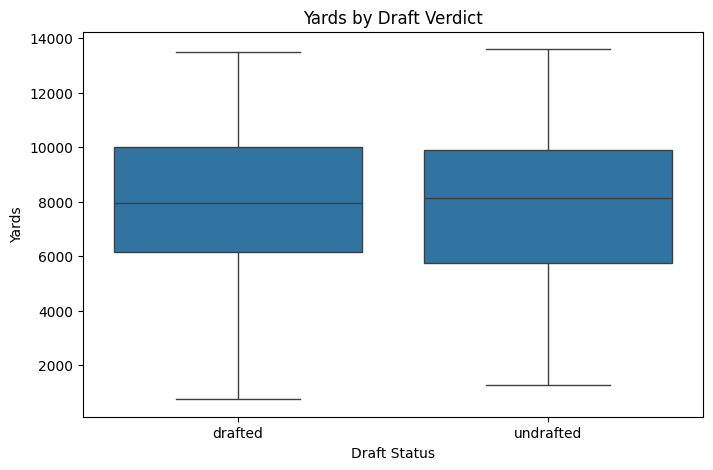

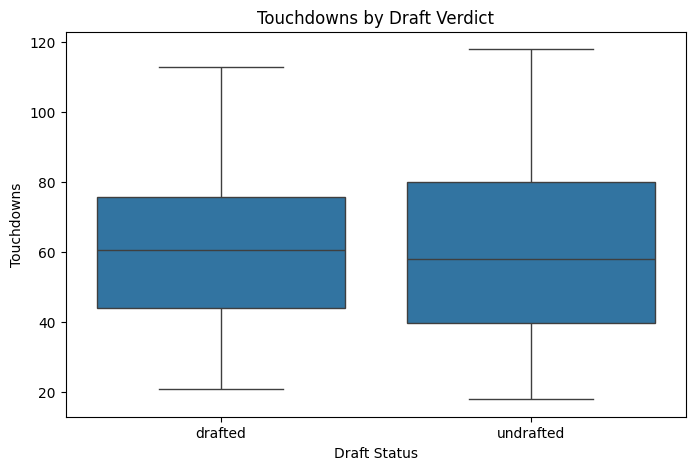

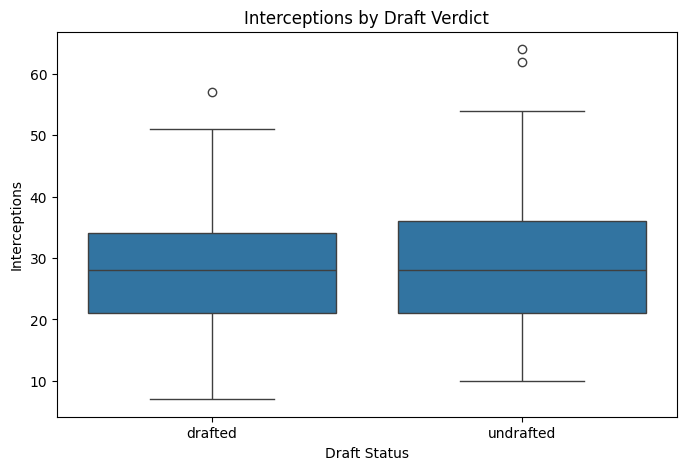

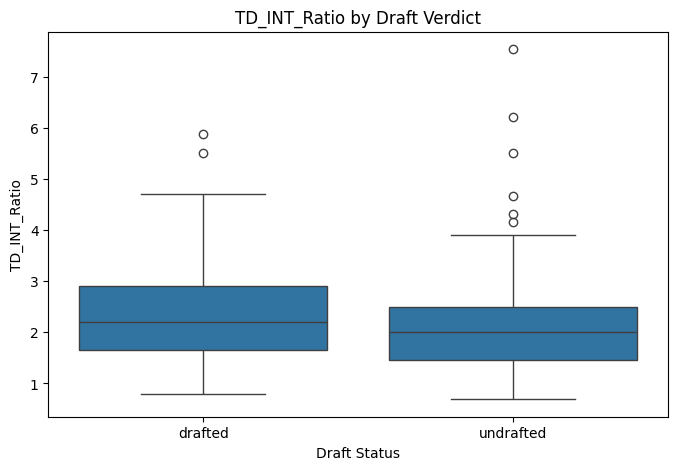


Average Stats by Draft Verdict:

                 Yards  Touchdowns  Interceptions  TD_INT_Ratio
Verdict_Label                                                  
drafted        8021.52       61.80          28.02          2.43
undrafted      8043.61       60.42          29.81          2.26


In [37]:
import seaborn as sns
import matplotlib.pyplot as plt


#  TD/INT ratio column (avoid divide by zero) 
qb_data['TD_INT_Ratio'] = qb_data['Touchdowns'] / qb_data['Interceptions'].replace(0, 0.1)
qb_data['Verdict_Label'] = qb_data['Verdict'].map({1: 'drafted', 0: 'undrafted'})

# Compare college passing stats between drafted and undrafted QBs
stats_to_compare = ['Yards', 'Touchdowns', 'Interceptions', 'TD_INT_Ratio']

for stat in stats_to_compare:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=qb_data, x='Verdict_Label', y=stat)
    plt.title(f'{stat} by Draft Verdict')
    plt.xlabel('Draft Status')
    plt.ylabel(stat)
    plt.show()

# Summary stats
summary = qb_data.groupby('Verdict_Label')[stats_to_compare].mean().round(2)
print("\nAverage Stats by Draft Verdict:\n")
print(summary)


The comparison shows only minor differences between drafted and undrafted quarterbacks in terms of college performance. While total passing yards and touchdowns are nearly identical, drafted quarterbacks tend to have slightly fewer interceptions and a modestly higher TD/INT ratio. This suggests a potential preference for quarterbacks who demonstrate better decision-making and efficiency, though the differences are not substantial and would require further statistical testing to confirm significance.

### Section 2: Physical Measurements & Athletic Performance vs. Draft Outcome

2. Do physical measurements (height, weight) and athletic performance (40-yard dash time) influence quarterback draft selection?

Data filtering: From the 417 QBs in our dataset, we created qb_40 = qb_data.dropna(subset=['40yd']) to focus on QBs with recorded 40-yard dash times. We converted the 40-yard times to numeric format using pd.to_numeric().

Height conversion: We created a custom function convert_height() to convert height from "feet-inches" format (e.g., "6-4") to total inches, creating a new column Ht_in.

Metrics examined:
- Height (converted from feet-inches format to total inches)
- Weight (pounds)
- 40-yard dash (seconds)

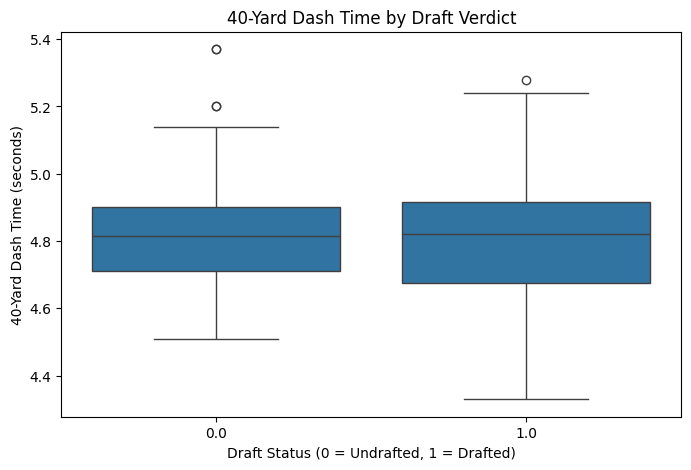


Average 40-Yard Dash Time by Draft Verdict:

Verdict
0.0    4.82
1.0    4.80
Name: 40yd, dtype: float64


In [38]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

qb_40 = qb_data.dropna(subset=['40yd'])

# Convert '40yd' to numeric if it's not already
qb_40['40yd'] = pd.to_numeric(qb_40['40yd'], errors='coerce')

# Boxplot: 40-yard dash times by draft status
plt.figure(figsize=(8, 5))
sns.boxplot(data=qb_40, x='Verdict', y='40yd')
plt.title('40-Yard Dash Time by Draft Verdict')
plt.xlabel('Draft Status (0 = Undrafted, 1 = Drafted)')
plt.ylabel('40-Yard Dash Time (seconds)')
plt.show()

# Print average 40-yard dash time for each group
avg_40 = qb_40.groupby('Verdict')['40yd'].mean().round(2)
print("\nAverage 40-Yard Dash Time by Draft Verdict:\n")
print(avg_40)

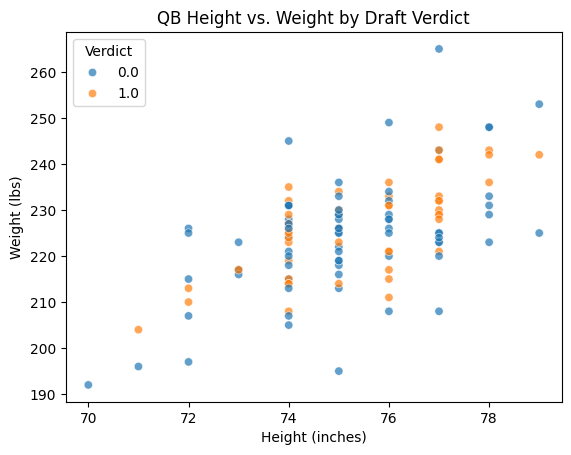

In [39]:
import pandas as pd

# Convert height if needed
def convert_height(ht):
    if isinstance(ht, str) and "-" in ht:
        parts = ht.split("-")
        feet = int(parts[0])
        inches = int(parts[1].replace('"', '').strip())
        return feet * 12 + inches
    return pd.to_numeric(ht, errors='coerce')

qb_data['Ht_in'] = qb_data['Ht'].apply(convert_height)

sns.scatterplot(data=qb_data, x='Ht_in', y='Wt', hue='Verdict', alpha=0.7)
plt.title('QB Height vs. Weight by Draft Verdict')
plt.xlabel('Height (inches)')
plt.ylabel('Weight (lbs)')
plt.show()


The scatter plot shows the distribution of quarterback height and weight, separated by draft status. Both drafted and undrafted QBs generally fall within a similar physical range — between 70 to 78 inches in height and 200 to 260 lbs in weight. However, there is a slight clustering of drafted quarterbacks (orange) around the mid-to-upper height and weight ranges (example:  74–76 inches and 220–240 lbs), suggesting that teams may slightly favor QBs with a more “prototypical” physical profile. That said, the overlap between the two groups is substantial, indicating that height and weight alone are not strong discriminators for draft outcome.



# Ethics & Privacy

The data required to answer our research question, which is whether a quarterback's college statistics and NFL combine performance can predict their likelihood of being drafted, is primarily sourced from publicly available databases maintained for the most part by the NCAA, NFL, and third party sports analytics organizations. These sources provide performance metrics such as college passing efficiency, rushing yards, and NFL combine results sources like the 40 yard dash, vertical leap, which are legally collected and publicly reported. So the data is considered ethical to use within the bounds of this project. Additionally, previous academic research such as Craig & Winchester (2021) used similar types of performance data to investigate draft outcomes, leading support to the relevance of these data sources. However, even though the data itself is public, we remain cautious about how combinations of variables like the college, height, and combine scores could make certain players identifiable,especially in smaller groups.To mitigate these concerns, we will consider recoding variables to reduce specificity like grouping schools by conference or categorizing physical metrics into ranges and avoid drawing attention to specific individuals.

Our analysis will focus on identifying performance related patterns associated with being drafted without implying judgment of players' inherent ability or value. The intention isn’t to reinforce or replicate scouting but to explore whether certain quantifiable features are consistently correlated with draft status. However, as noted in the background of the project, scouting and drafting processes themselves are not always rational or objective. For example Craig & Winchester (2021) found that rushing ability among quarterbacks is often undervalued despite its significant contribution to NFL success, suggesting the presence of bias in talent evaluations. Wolfson (2021) argued that the NFL draft outcomes are affected by both randomness and the overvaluation of certain traits, which can affect long term success predictions. As well as the overrepresentation of athletes from elite conferences or the undervaluation of mobile quaterbacks may reflect broader systemic inequities. Therefore we will audit our data for imbalances, for example between Power Five and non Power Five conferences, and avoid including features that serve as proxies for race or socioeconomic status unless we are explicitly analyzing their impact on our data. Our goal is not to predict player “worth” but to better understand how past decisions have been made and if there's any patterns, can we use those patterns to predict accurately if they will be drafted?

# Team Expectations 

* We use Discord for all team communication, and everyone must check and respond within 24 hours.
* Each member must contribute to at least two meaningful opinions for each assignment discussion.
* It is acceptable to tag others for reminders.
* If you will be unavailable for the day of an assignment, inform the group ahead of time.
* Everyone must be responsive and available the day before and the day of each major deadline.

# Project Timeline Proposal

Specify your team's specific project timeline. An example timeline has been provided. Changes the dates, times, names, and details to fit your group's plan.

If you think you will need any special resources or training outside what we have covered in COGS 108 to solve your problem, then your proposal should state these clearly. For example, if you have selected a problem that involves implementing multiple neural networks, please state this so we can make sure you know what you’re doing and so we can point you to resources you will need to implement your project. Note that you are not required to use outside methods.



| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 5/6  |  8 PM | Search for additional datasets  | Choosing final datasets | 
| 5/12  |  8 PM |  Working on data checkpoint | Making sure data checkpoint assignment is on track/ready to submit  | 
| 5/19  | 8 PM  | Work on EDA, import and wrangle data   | Discuss Wrangling and possible analytical approaches; Assign group members to lead each specific part, thinking about visualizations   |
| 5/26  | 8 PM  | Prepare for EDA submission | Review/Edit wrangling/EDA; Discuss Analysis Plan   |
| 6/2  | 8 PM  | Working on analysis, perhaps optimize data visualization for ease of analysis | Discuss/edit Analysis; plan time for video part of project and what we will need. Assign necessary video parts group members  |
| 6/9  | 8 PM  | Complete analysis; Draft results/conclusion/discussion. Ideally, should be done with recording video and project| Discuss/edit full project and video. Review significance of project, revisit ethics and privacy |
| 6/11  | Before 11:59 PM  | Review project make sure it is finalized | Turn in Final Project & Group Project Surveys |